# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
table = soup.find('table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
rows = table.find_all('tr')
data = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:  # Skipping the header row
    # Find all the cells (td tags) in the row
    cells = row.find_all('td')
    
    # Extract text from each cell
    row_data = [cell.get_text(strip=True) for cell in cells]
    
    # Append the row data to the list
    data.append(row_data)

In [8]:
# Close the browser
browser.quit()

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(data, columns=columns)

In [10]:
# Confirm DataFrame was created successfully
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [13]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# 2. Convert 'id', 'sol', and 'month' to integer (int)
df['id'] = df['id'].astype(int)
df['sol'] = df['sol'].astype(int)
df['month'] = df['month'].astype(int)

# 3. Convert 'min_temp' to float (temperature might have decimals)
df['min_temp'] = df['min_temp'].astype(float)

# 4. Convert 'pressure' to float
# Assuming the column has 'Pa' (pressure units) attached to the values, we'll need to clean the data first
df['pressure'] = df['pressure'].str.replace(' Pa', '')  # Remove 'Pa' units if present
df['pressure'] = df['pressure'].astype(float)

# After conversion, check the data types again to confirm the changes
print("\nAfter conversion:")
print(df.dtypes)

# Optionally, display the first few rows to confirm the changes visually
print(df.head())



After conversion:
id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                          object
month                        int32
min_temp                   float64
pressure                   float64
dtype: object
   id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0


In [14]:
# Confirm type changes were successful by examining data types again
print("Data types after conversion:")
print(df.dtypes)

Data types after conversion:
id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                          object
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f"There are {num_months} months on Mars.")

There are 12 months on Mars.


In [16]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = df['sol'].nunique()
print(f"There are {num_sols} Martian days worth of data in the dataset.")

There are 1867 Martian days worth of data in the dataset.


The coldest month on Mars is month 3.
The warmest month on Mars is month 8.


<Axes: title={'center': 'Average Minimum Temperature by Month on Mars'}, xlabel='Month', ylabel='Average Min Temperature (°C)'>

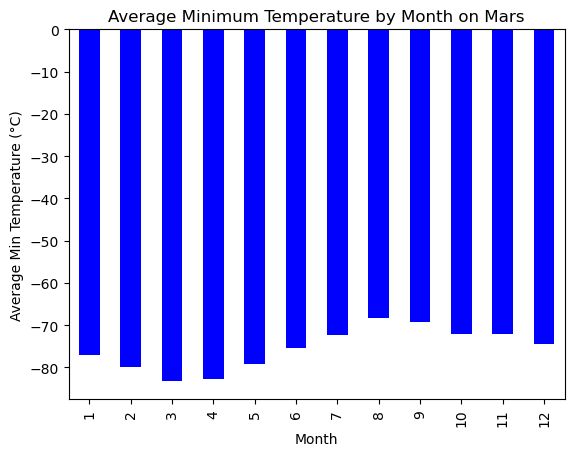

In [17]:
# 3. What is the average minimum temperature by month?
# Group by month and calculate the average minimum temperature
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Find the coldest and warmest months
coldest_month = avg_min_temp_by_month.idxmin()
warmest_month = avg_min_temp_by_month.idxmax()

print(f"The coldest month on Mars is month {coldest_month}.")
print(f"The warmest month on Mars is month {warmest_month}.")

# Plotting the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Min Temperature (°C)',
                           title='Average Minimum Temperature by Month on Mars', color='blue')


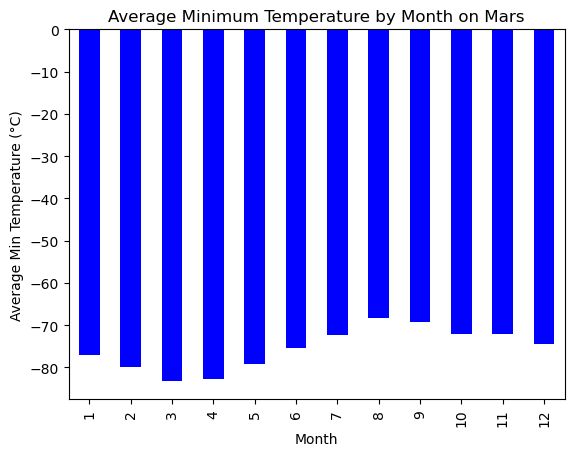

In [18]:
# Plot the average minimum temperature by month
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Group by month and calculate the average minimum temperature
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Plotting the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Min Temperature (°C)',
                           title='Average Minimum Temperature by Month on Mars', color='blue')

# Show the plot
plt.show()


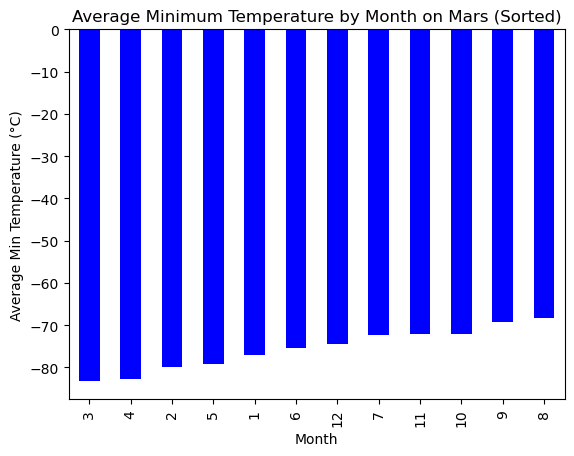

The coldest month on Mars is month 3.
The hottest month on Mars is month 8.


In [19]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Group by month and calculate the average minimum temperature
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Sort the average minimum temperature by ascending order
avg_min_temp_by_month_sorted = avg_min_temp_by_month.sort_values()

# Plot the sorted average minimum temperature by month
avg_min_temp_by_month_sorted.plot(kind='bar', xlabel='Month', ylabel='Average Min Temperature (°C)',
                                  title='Average Minimum Temperature by Month on Mars (Sorted)', color='blue')

# Show the plot
plt.show()

# Identify the coldest and hottest months
coldest_month = avg_min_temp_by_month_sorted.idxmin()
hottest_month = avg_min_temp_by_month_sorted.idxmax()

print(f"The coldest month on Mars is month {coldest_month}.")
print(f"The hottest month on Mars is month {hottest_month}.")


In [20]:
# 4. What is the average pressure by month?
# Group the data by 'month' and calculate the average atmospheric pressure for each month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Sort the data by month for clarity (though it's likely already sorted)
avg_pressure_by_month_sorted = avg_pressure_by_month.sort_index()

# Print the average pressure by month
print("Average Atmospheric Pressure by Month on Mars:")
print(avg_pressure_by_month_sorted)


Average Atmospheric Pressure by Month on Mars:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


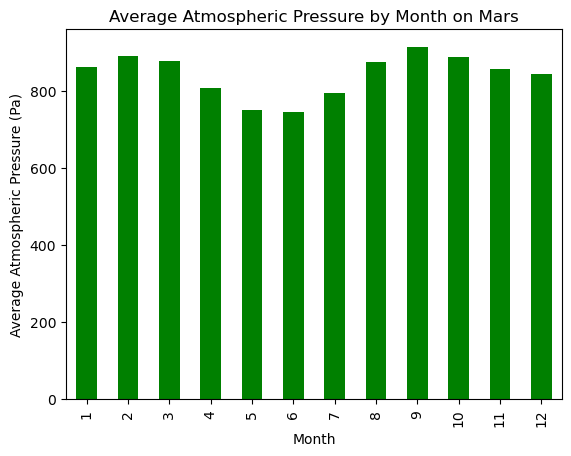

In [21]:
# Plot the average pressure by month
# Group by month and calculate the average atmospheric pressure
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Atmospheric Pressure (Pa)',
                           title='Average Atmospheric Pressure by Month on Mars', color='green')

# Show the plot
plt.show()

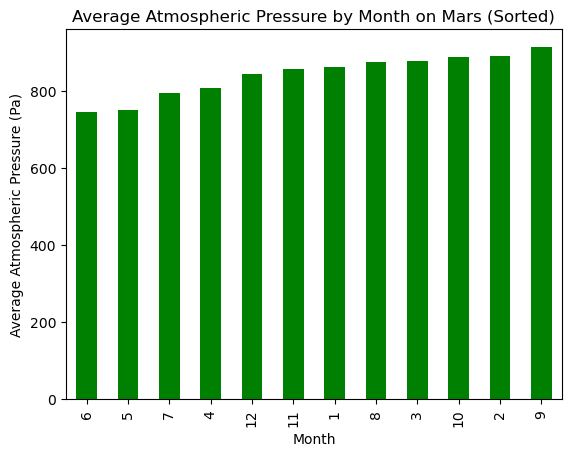

The month with the lowest atmospheric pressure is month 6.
The month with the highest atmospheric pressure is month 9.


In [22]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Group by month and calculate the average atmospheric pressure
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Sort the average pressure by ascending order
avg_pressure_by_month_sorted = avg_pressure_by_month.sort_values()

# Plot the sorted average pressure by month
avg_pressure_by_month_sorted.plot(kind='bar', xlabel='Month', ylabel='Average Atmospheric Pressure (Pa)',
                                  title='Average Atmospheric Pressure by Month on Mars (Sorted)', color='green')

# Show the plot
plt.show()

# Identify the lowest and highest pressure months
lowest_pressure_month = avg_pressure_by_month_sorted.idxmin()
highest_pressure_month = avg_pressure_by_month_sorted.idxmax()

print(f"The month with the lowest atmospheric pressure is month {lowest_pressure_month}.")
print(f"The month with the highest atmospheric pressure is month {highest_pressure_month}.")

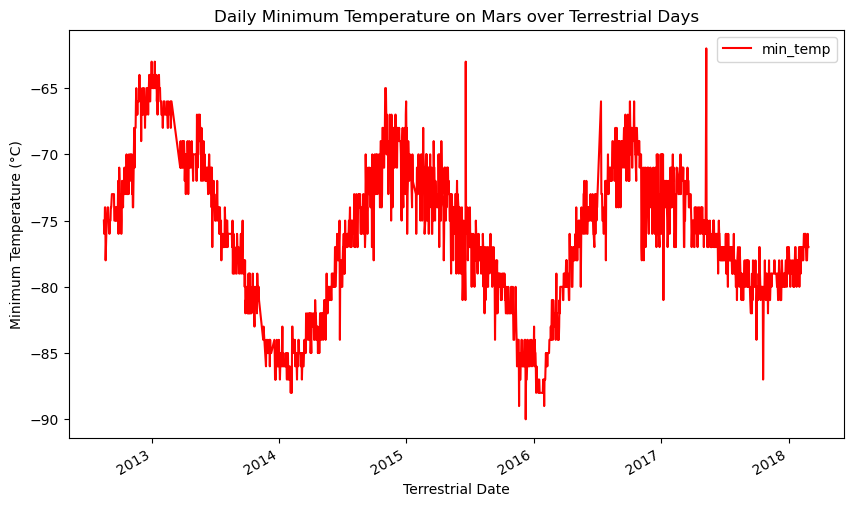

In [23]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Plot the daily minimum temperature as a function of the terrestrial date
df.plot(x='terrestrial_date', y='min_temp', kind='line', xlabel='Terrestrial Date', ylabel='Minimum Temperature (°C)',
        title='Daily Minimum Temperature on Mars over Terrestrial Days', color='red', figsize=(10,6))

# Show the plot
plt.show()


#### Minimum Temperature

The Martian minimum temperature data provides a clear view of the extreme and cyclical nature of Mars' climate. With temperatures regularly dropping below -80°C, Mars is an inhospitable environment, especially during its colder months. The repeating temperature pattern in the dataset allows us to visually estimate that a Martian year lasts about 687 Earth days, consistent with known astronomical data. This analysis offers valuable insights into the seasonal behavior of Mars' atmosphere and its challenging surface conditions.

#### Atmospheric Pressure

The atmospheric pressure data from Curiosity’s location provides an intriguing look into how Mars’ thin atmosphere behaves seasonally. With pressures fluctuating between 700 Pa and 770 Pa over the Martian year, the atmosphere undergoes dramatic changes due to the sublimation and condensation of CO₂ in the polar regions. The lowest pressures occur when Mars is farthest from the Sun, while the highest pressures are recorded when Mars is closest. These findings illustrate the dynamic and fragile nature of Mars’ atmosphere, which is heavily influenced by the planet’s orbit and the cycling of carbon dioxide between the poles and the atmosphere. Understanding these pressure variations is key to preparing for future missions and potential human exploration on Mars.

#### Year Length

The data from Curiosity’s location on Mars provides clear evidence of the planet’s longer year. By tracking the cyclic nature of temperature changes, we can confirm that a Martian year lasts approximately 687 Earth days. This length is nearly twice as long as an Earth year, meaning that seasonal changes on Mars, while similar to Earth in structure, last much longer. Understanding the length of a Martian year and its seasonal effects is critical for planning future missions to Mars, particularly those involving long-term human exploration and habitation. The extended seasons, combined with extreme temperature and pressure variations, pose significant challenges for any endeavor on the Red Planet.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)
print("Data has been successfully saved to 'mars_weather_data.csv'.")

Data has been successfully saved to 'mars_weather_data.csv'.


In [25]:
browser.quit()